In [1]:
import numpy as np
import os
import csv
import operator
import time
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
class Perceptron:
    
    def __init__(self, learning_rate=0.01, iters=1000):
        self.lr = learning_rate
        self.iters = iters
        self.weights = None
        self.bias = None
        self.w_data = []
        self.b_data = []

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0
        for it in range(self.iters):
            
            for idx, x_i in enumerate(X):

                soft_op = np.dot(x_i, self.weights) + self.bias
                if soft_op>=0:
                    y_predicted = 1
                else:
                    y_predicted = 0
                if it==0:
                    self.w_data.append(self.weights)  
                    self.b_data.append(self.bias)
                    
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                
            self.w_data.append(self.weights)  
            self.b_data.append(self.bias)
            
                                    
    
    
    def get_weights(self):
        #print(self.weights,bias)
        return self.w_data, self.b_data
    
    
    def plot(self, X,y):
        
        plt.clf()
        plt.scatter(X[:,0],X[:,1],c=y)
        x1 = np.linspace(1000,3000,100)
        x2 = -(self.weights[0]*x1+self.bias)/self.weights[1]
        plt.plot(x1,x2)
        #plt.axis('off')
        plt.xlim = [1000,3000]
        plt.ylim = [1000,3000]
        plt.show()

In [14]:
os.chdir(r'C:\Users\Diksha Menghmalani\Desktop\study material\Diksha_Repository')
def get_data():
    with open('mnist0_7.csv', newline= '') as csv_file2:
        data_lines = csv.reader(csv_file2)
        dataset = list(data_lines)
        dataset[0][0] = '7'
        matrix = np.array(dataset).astype('int')
        
    no_samples = matrix.shape[0]
    lables = np.array([0 for i in range(no_samples)])
    for i in range(no_samples):
        lables[i] = 0 if matrix[i][0]==0 else 1
        
    return matrix,lables

In [15]:
def calculate_euclidean_distance(sample1,sample2):
    dist = np.linalg.norm(sample1-sample2)
    return dist

In [16]:
X,y =  get_data()

In [17]:
ref_0 = X[1][1:]
ref_7 = X[0][1:]
X = X[2:]
y= y[2:]

In [18]:
def get_distance(X,y,ref_0,ref_7):
    
    no_samples = X.shape[0]
    distances = np.array([[0,0] for i in range(no_samples)])
    
    for i , val in enumerate(X):
        dist_0 = calculate_euclidean_distance(val[1:], ref_0)
        dist_7 = calculate_euclidean_distance(val[1:], ref_7)
        
        distances[i][0] = dist_0
        distances[i][1] = dist_7
        
    return distances

In [19]:
distances = get_distance(X,y,ref_0,ref_7)

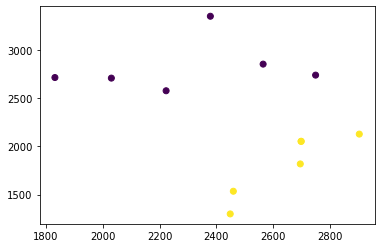

In [20]:
plt.scatter(distances[:,0], distances[:,1],c = y)

In [21]:
model = Perceptron()

In [26]:
model.fit(distances,y)

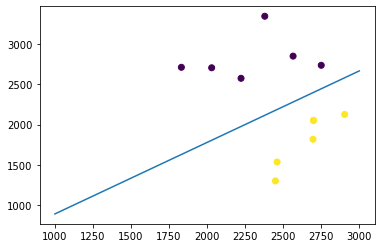

In [27]:
model.plot(distances,y)